In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [57]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [58]:
df_atual = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [59]:
df_test1 = pd.read_csv('test.csv')

In [60]:
#Remove as linhas que tem dados faltantes da variável Target
def remove_linhas_NaN(data,col):
    data = data.drop(data[col].loc[data[col].isna()].index)
    return data

In [61]:
df_atual = remove_linhas_NaN(df_atual,'NU_NOTA_MT')
df_atual

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [62]:
indices_LC_zero = df_atual[df_atual['TP_PRESENCA_LC']==0].index

In [63]:
df_atual['NU_NOTA_MT'].iloc[indices_LC_zero] = 0

C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
from sklearn.impute import SimpleImputer
imp_media = SimpleImputer(missing_values=np.nan, strategy='mean')

In [65]:
df_atual['NU_NOTA_MT'] = imp_media.fit_transform(df_atual[['NU_NOTA_MT']])
df_atual['NU_NOTA_MT'].isnull().value_counts()

False    10133
Name: NU_NOTA_MT, dtype: int64

In [66]:
y=df_atual['NU_NOTA_MT']

In [67]:
#Identifica as colunas que existem em ambos dataframes
def colunas_em_ambos_dataframes(data_train, data_test):
    ambos = []
    for i in data_train.columns:
        for j in data_test.columns:
            if (i in  data_train.columns) & (i in data_test.columns):
                ambos.append(i)
    return list(np.unique(ambos))

In [68]:
colunas_ativas = colunas_em_ambos_dataframes(df_atual, df_test)
df_atual = df_atual[colunas_ativas]
df_test = df_test[colunas_ativas]

In [69]:
def identifica_colunas_nulas(data):
    cols = []
    faltante = []
    for col in data.columns:
        if data[col].isnull().value_counts().shape[0]==2:
            cols.append(col)
            faltante.append(data[col].isnull().value_counts()[1])
            dic_null = {'colunas':cols, 'Qtde NaN': faltante}
            df_null = pd.DataFrame.from_dict(dic_null)
    return list(df_null['colunas']) 
            

In [70]:
drop_colunas_train = identifica_colunas_nulas(df_atual)
drop_colunas_train

['NU_NOTA_CH', 'NU_NOTA_CN', 'Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO']

In [1]:
df_train.loc[df_train[df_train['TP_PRESENCA_CH']== 0].index,'NU_NOTA_CH'] = 0
df_train.loc[df_train[df_train['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CH']== 0].index, 'NU_NOTA_CH'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0

NameError: name 'df_train' is not defined

In [71]:
df_atual[list(drop_colunas_train)].select_dtypes(include='float').columns

Index(['NU_NOTA_CH', 'NU_NOTA_CN', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], dtype='object')

In [72]:
from sklearn.impute import SimpleImputer
imp_media = SimpleImputer(missing_values=np.nan, strategy='mean')

In [73]:
completa_media = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 
                  'NU_NOTA_COMP5', 'NU_NOTA_LC','NU_NOTA_REDACAO']

In [74]:
imp_media.fit(df_atual[completa_media])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [75]:
df_atual[completa_media] = imp_media.transform(df_atual[completa_media])

<ipython-input-75-5f3128279f76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atual[completa_media] = imp_media.transform(df_atual[completa_media])
C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [76]:
df_test[completa_media] = imp_media.transform(df_test[completa_media])

In [77]:
mais_freq =['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'TP_STATUS_REDACAO']
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [78]:
imp_freq.fit(df_atual[mais_freq])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [79]:
df_atual[mais_freq] = imp_freq.transform(df_atual[mais_freq])

<ipython-input-79-5f363bdfcba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atual[mais_freq] = imp_freq.transform(df_atual[mais_freq])
C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
df_test[mais_freq] = imp_freq.transform(df_test[mais_freq])

In [81]:
drop_colunas_train = identifica_colunas_nulas(df_atual)
drop_colunas_train 

['Q027']

In [82]:
df_atual['Q027'].value_counts()

D    846
F    776
C    499
E    469
B    430
A    273
G    264
H    165
I     90
M     75
J     56
K     43
L     21
Name: Q027, dtype: int64

In [83]:
import random
lista_freq_Q027 = df_atual['Q027'].value_counts().index[0:7]
df_atual['Q027'] = df_atual['Q027'].fillna(random.choice(lista_freq_Q027))

<ipython-input-83-419207f486e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atual['Q027'] = df_atual['Q027'].fillna(random.choice(lista_freq_Q027))


In [84]:
df_test['Q027'] = df_test['Q027'].fillna(random.choice(lista_freq_Q027))

In [85]:
category_features = df_atual.select_dtypes(include='object').columns
category_features

Index(['CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_INSCRICAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027',
       'Q047', 'SG_UF_RESIDENCIA', 'TP_SEXO'],
      dtype='object')

In [86]:
colunas_excluidas = ['CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_MT', 'SG_UF_RESIDENCIA']

In [87]:
colunas_excluidas

['CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'SG_UF_RESIDENCIA']

In [88]:
df_atual.drop(colunas_excluidas, axis=1, inplace=True)
df_test.drop(colunas_excluidas, axis=1, inplace=True)

C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
df_atual['TP_SEXO'] = pd.get_dummies(df_atual['TP_SEXO'], drop_first=1)
df_test['TP_SEXO'] = pd.get_dummies(df_test['TP_SEXO'], drop_first=1)

<ipython-input-89-7c1e4af736ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atual['TP_SEXO'] = pd.get_dummies(df_atual['TP_SEXO'], drop_first=1)


In [90]:
from sklearn import preprocessing

In [91]:
def converte_var_categoricas(data):
    le = []
    i=0
    category_features = data.select_dtypes(include='object').columns
    for col_category in category_features:
        le.append(preprocessing.LabelEncoder())
        data[col_category] = le[i].fit_transform(data[col_category])
        i+=1
    return data

In [92]:
df_atual = converte_var_categoricas(df_atual.drop('NU_INSCRICAO', axis=1))

In [93]:
df_test = converte_var_categoricas(df_test.drop('NU_INSCRICAO', axis=1))

In [94]:
df_atual

,CO_UF_RESIDENCIA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DISCALCULIA,IN_DISLEXIA,IN_GESTANTE,IN_IDOSO,IN_SABATISTA,IN_SURDEZ,IN_TREINEIRO,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_ANO_CONCLUIU,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_ENSINO,TP_ESCOLA,TP_LINGUA,TP_NACIONALIDADE,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_SEXO,TP_STATUS_REDACAO,TP_ST_CONCLUSAO
0,43,0,0,0,0,0,0,0,0,0,24,495.4,436.3,120.0,120.0,120.0,80.0,80.0,581.2,520.0,3,3,2,0,0,2,7,0,4,1,2.0,1.0,1,1,1,1,1,1,1,1.0,1
1,23,0,0,0,0,0,0,0,0,0,17,544.1,474.5,140.0,120.0,120.0,120.0,80.0,599.0,580.0,0,0,1,0,0,0,1,0,0,3,2.0,1.0,2,1,1,1,1,1,0,1.0,2
5,29,0,0,0,0,0,0,0,0,0,18,583.2,439.7,120.0,120.0,120.0,160.0,100.0,410.9,620.0,4,4,2,1,1,0,1,0,1,1,2.0,1.0,1,0,1,1,1,1,0,1.0,1
6,51,0,0,0,0,0,0,0,0,0,18,604.2,420.1,100.0,120.0,120.0,120.0,100.0,484.5,560.0,4,3,2,1,1,2,4,0,0,3,2.0,1.0,2,0,1,1,1,1,0,1.0,2
7,43,0,0,0,0,0,0,0,0,0,18,625.8,619.6,140.0,120.0,120.0,120.0,120.0,611.2,620.0,6,5,11,1,1,0,1,3,1,1,2.0,1.0,1,0,1,1,1,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,35,0,0,0,0,0,0,0,0,0,20,419.7,438.2,120.0,120.0,80.0,80.0,40.0,394.5,440.0,4,4,6,1,1,1,2,0,3,1,2.0,1.0,1,0,1,1,1,1,1,1.0,1
13726,26,0,0,0,0,0,0,0,0,0,33,557.9,423.8,120.0,120.0,120.0,120.0,80.0,533.0,560.0,0,0,2,0,1,1,8,0,10,3,2.0,1.0,1,1,2,1,1,1,0,1.0,1
13727,43,0,0,0,0,0,0,0,0,1,15,528.9,460.5,120.0,120.0,120.0,120.0,120.0,569.3,600.0,2,6,1,0,1,0,1,0,0,1,2.0,1.0,1,0,1,1,1,1,0,1.0,3
13728,33,0,0,0,0,0,0,0,0,0,36,621.7,422.5,100.0,100.0,80.0,80.0,100.0,569.0,460.0,1,3,6,1,1,2,4,0,0,3,2.0,1.0,1,1,1,1,1,1,1,1.0,4


In [95]:
X_train = df_atual
X_test = df_test
y_train = y

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.feature_importances_

array([3.71290684e-02, 4.25117551e-05, 0.00000000e+00, 3.81265945e-05,
       1.43602570e-06, 4.02994492e-05, 1.46001273e-06, 1.10021908e-03,
       1.41804523e-06, 2.24181286e-03, 2.74504977e-02, 1.27679467e-01,
       4.20341751e-01, 1.21415963e-02, 1.19300261e-02, 1.23258863e-02,
       1.27658400e-02, 2.07160111e-02, 8.99522316e-02, 2.70985834e-02,
       2.22393817e-02, 2.30872899e-02, 3.51758141e-02, 1.14183688e-02,
       5.44107725e-03, 7.81143690e-03, 1.52914650e-02, 9.35443356e-03,
       1.27924371e-02, 1.37701978e-02, 2.20347438e-03, 1.50075420e-03,
       5.38813188e-03, 6.31168594e-03, 2.32219993e-03, 2.09503377e-04,
       2.57348656e-04, 0.00000000e+00, 1.49491537e-02, 7.92415380e-04,
       6.68518843e-03])

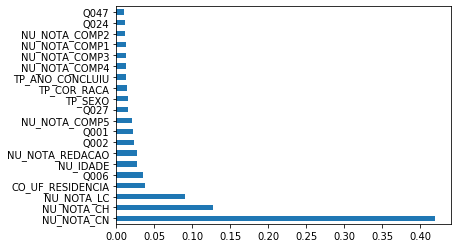

In [98]:
feat_imp = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [99]:
cols_relevantes = feat_imp.nlargest(30).index[0:10]

In [100]:
#X_train, X_test, y_train, y_test = train_test_split(df_novo, y, test_size=0.15, random_state=42)

#rf = RandomForestRegressor(max_depth=20, random_state=0)
rf.fit(X_train, y_train)
y_pred_novo = rf.predict(X_test)

In [101]:
y_scaler = preprocessing.StandardScaler().fit(pd.DataFrame(y_train))

In [102]:
y_pred_scaler = y_scaler.transform(pd.DataFrame(y_pred_novo))
y_pred_scaler.shape

(4576, 1)

In [103]:
y_test_scaler = y_scaler.transform(pd.DataFrame(y_test[0:2134]))
y_test_scaler.shape

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred_novo, squared=False)

In [ ]:
ax = plt.subplots()

plt.plot(range(100,200), y_test[100:200])
plt.plot(range(100,200), y_pred_novo[100:200], color = 'red')

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100))

In [ ]:
mlp.fit(X_train,y_train)

In [ ]:
y_pred_neural = mlp.predict(X_test)

In [ ]:
y_pred_scaler_neural = y_scaler.transform(pd.DataFrame(y_pred_neural))

In [ ]:
mean_squared_error(y_test, y_pred_neural, squared=False)

In [ ]:
ax = plt.subplots()

plt.plot(range(100,200), y_test[100:200])
plt.plot(range(100,200), y_pred_neural[100:200], color = 'red')

In [ ]:
y_pred_novo.shape

In [ ]:
y_pred_novo

In [ ]:
df_test1['NU_NOTA_MT'] =  y_pred_novo

In [ ]:
df_test

In [ ]:
answer = df_test1[['NU_INSCRICAO', 'NU_NOTA_MT']]

In [ ]:
answer.head()

In [ ]:
answer.to_csv('answer.csv', index=False)